<a href="https://colab.research.google.com/github/mikeacquaviva/APS360-Leukaemia-Classification/blob/main/Pre_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash
git clone https://github.com/mikeacquaviva/APS360-Leukaemia-Classification.git


Cloning into 'APS360-Leukaemia-Classification'...


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shutil

import cv2
import os
import numpy as np
from skimage import transform
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display
import io
import os
import numpy as np
from PIL import Image, ImageEnhance



Processing 985 images in Early folder:
Original Image:


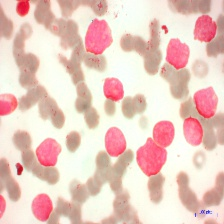

Masked Image:


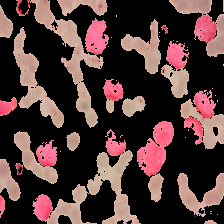

Resized Image:


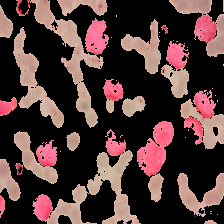

Segmented Image:


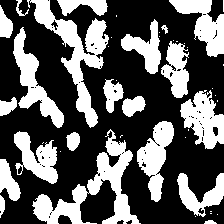

Original Image:


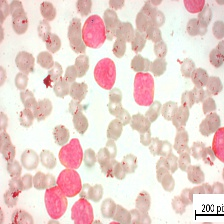

Masked Image:


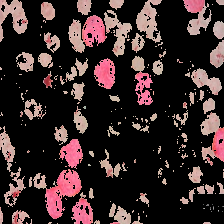

Resized Image:


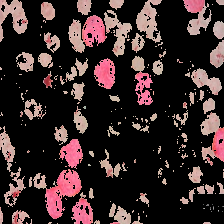

Segmented Image:


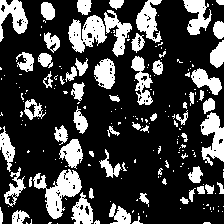

Processing 504 images in Benign folder:
Original Image:


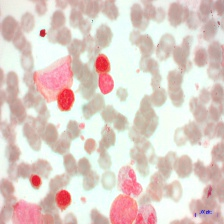

Masked Image:


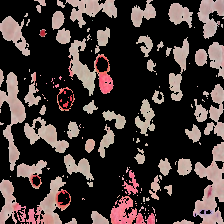

Resized Image:


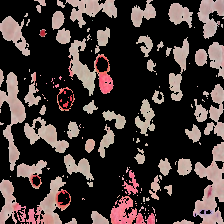

Segmented Image:


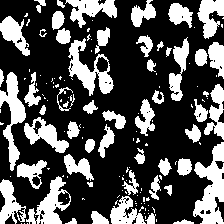

Original Image:


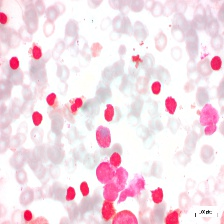

Masked Image:


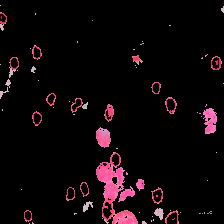

Resized Image:


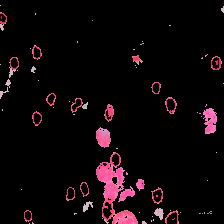

Segmented Image:


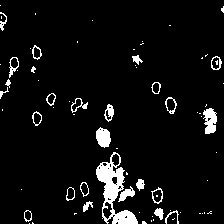

Processing 963 images in Pre folder:
Original Image:


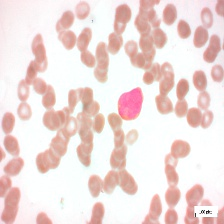

Masked Image:


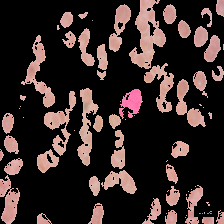

Resized Image:


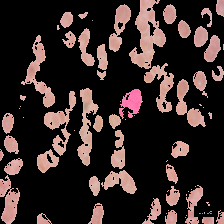

Segmented Image:


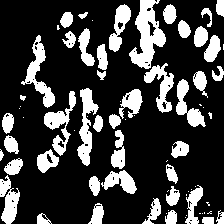

Original Image:


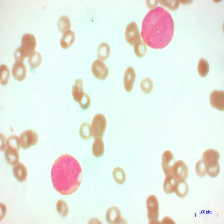

Masked Image:


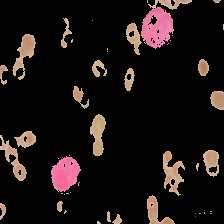

Resized Image:


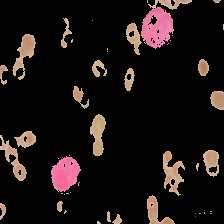

Segmented Image:


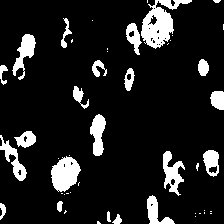

Processing 1214 images in Healthy folder:
Original Image:


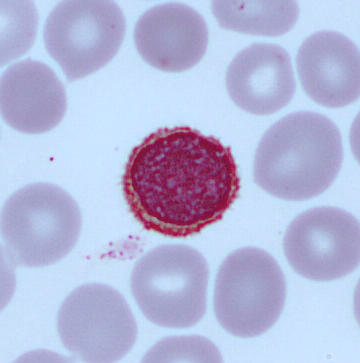

Masked Image:


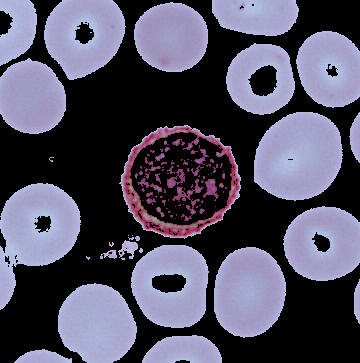

Resized Image:


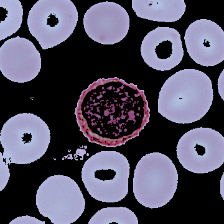

Segmented Image:


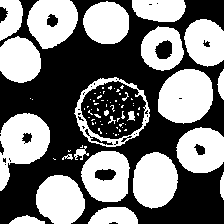

Original Image:


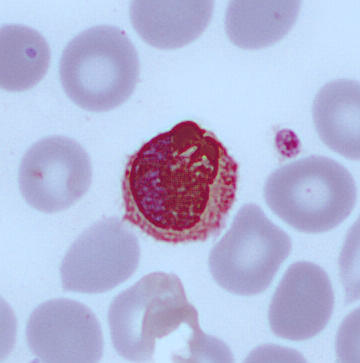

Masked Image:


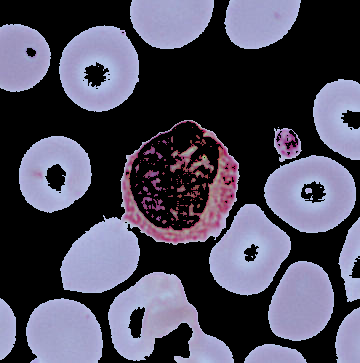

Resized Image:


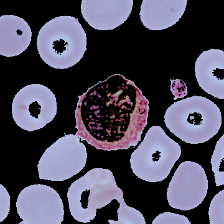

Segmented Image:


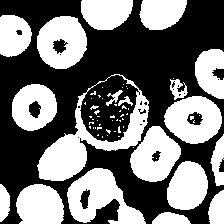

Processing 804 images in Pro folder:
Original Image:


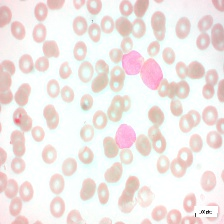

Masked Image:


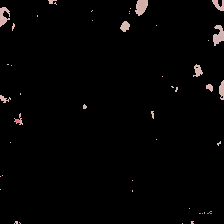

Resized Image:


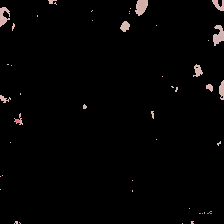

Segmented Image:


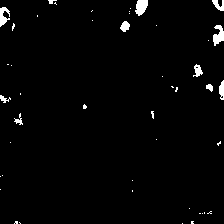

Original Image:


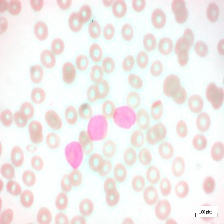

Masked Image:


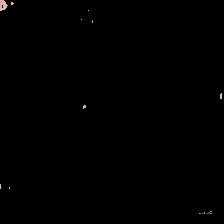

Resized Image:


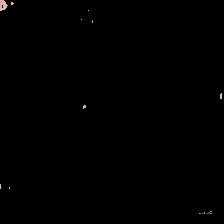

Segmented Image:


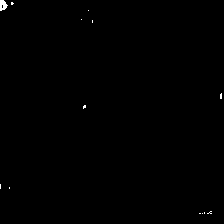

In [3]:
img_size = (224, 224)

main_src_dir = "/content/APS360-Leukaemia-Classification/images"
main_dst_dir = "/content/APS360-Leukaemia-Classification/pre-processed"
main_train_dir = "/content/APS360-Leukaemia-Classification/Training"
main_test_dir = "/content/APS360-Leukaemia-Classification/Testing"
main_val_dir = "/content/APS360-Leukaemia-Classification/Validation"

# define the lower and upper bounds of the pink, blue, and purple colors in LAB color space
pink_lower = np.array([130, 70, 215])
pink_upper = np.array([230, 170, 255])
blue_lower = np.array([90, 120, 100])
blue_upper = np.array([180, 200, 160])
purple_lower = np.array([100, 50, 100])
purple_upper = np.array([200, 150, 200])

if not os.path.exists(main_dst_dir):
  os.mkdir(main_dst_dir)
# iterate through subdirectories in the main directory
for subdir in os.listdir(main_src_dir):
    subdir_path = os.path.join(main_src_dir, subdir)
    new_subdir_path = os.path.join(main_dst_dir, subdir)
    if not os.path.exists(new_subdir_path):
      os.mkdir(new_subdir_path)
    count = 0
    if os.path.isdir(subdir_path):
        file_num = len(os.listdir(subdir_path))
        print(f"Processing {file_num} images in {subdir} folder:")
        
        # iterate through images in the subdirectory
        for filename in os.listdir(subdir_path):
            
            if filename.endswith(".jpg") or filename.endswith(".jpeg"):
    
                    # load the image using OpenCV
                    img = cv2.imread(os.path.join(subdir_path, filename))

                    # convert the image from RGB to LAB color space
                    lab_img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

                    # define masks for the pink, blue, and purple colors
                    pink_mask = cv2.inRange(lab_img, pink_lower, pink_upper)
                    blue_mask = cv2.inRange(lab_img, blue_lower, blue_upper)
                    purple_mask = cv2.inRange(lab_img, purple_lower, purple_upper)

                    # combine the masks into a single mask
                    mask = cv2.bitwise_or(pink_mask, blue_mask)
                    mask = cv2.bitwise_or(mask, purple_mask)

                    # apply the mask to the original image
                    masked_img = cv2.bitwise_and(img, img, mask=mask)
                    if count < 2 :
                      # display the original image
                      print("Original Image:")
                      display(Image.fromarray(img))

                      # display the masked image
                      print("Masked Image:")
                      display(Image.fromarray(masked_img))

                      # resize the image
                      resized_img = cv2.resize(masked_img, img_size)

                      # display the resized image
                      print("Resized Image:")
                      display(Image.fromarray(resized_img))

                    # normalize the pixel values
                    normalized_img = resized_img / 255.0

                    # convert the RGB image to grayscale
                    gray_img = cv2.cvtColor(np.uint8(normalized_img*255), cv2.COLOR_RGB2GRAY)

                    # apply Otsu's thresholding to segment the image
                    _, segmented_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

                    # convert the segmented image back to PIL format
                    segmented_img = Image.fromarray(segmented_img)
                    if count < 2:
                      # display the segmented image
                      print("Segmented Image:")
                      display(segmented_img)

                    # save segmented image
                    segmented_img_path = os.path.join(new_subdir_path, filename)
                    segmented_img.save(segmented_img_path)
                    
                    count += 1
              

        

In [9]:
#Create Train, Test, and Validation Directories and put the appropriate amount 
#of images in them
if not os.path.exists(main_train_dir):
  os.mkdir(main_train_dir)
if not os.path.exists(main_test_dir):
  os.mkdir(main_test_dir)
if not os.path.exists(main_val_dir):
  os.mkdir(main_val_dir)
# iterate through subdirectories in the segmented directory and place 60% in
# training, 20% in testing, and 20% in validation
for subdir in os.listdir(main_dst_dir):
    subdir_path = os.path.join(main_dst_dir, subdir)
    train_subdir_path = os.path.join(main_train_dir, subdir)
    test_subdir_path = os.path.join(main_test_dir, subdir)
    val_subdir_path = os.path.join(main_val_dir, subdir)
    if not os.path.exists(train_subdir_path):
      os.mkdir(train_subdir_path)
    if not os.path.exists(test_subdir_path):
      os.mkdir(test_subdir_path)
    if not os.path.exists(val_subdir_path):
      os.mkdir(val_subdir_path)
    count = 0
    if os.path.isdir(subdir_path):
        file_num = len(os.listdir(subdir_path))
        print(f"Processing {file_num} images in {subdir} folder:")
        
        # iterate through images in the subdirectory
        for filename in os.listdir(subdir_path):
            if filename.endswith(".jpg") or filename.endswith(".jpeg"):
              if count < 0.6*file_num:
                shutil.copy(os.path.join(subdir_path, filename), 
                            os.path.join(train_subdir_path, filename))
              elif count < 0.8*file_num and count >= 0.6*file_num:
                shutil.copy(os.path.join(subdir_path, filename), 
                            os.path.join(test_subdir_path, filename))
              else:
                shutil.copy(os.path.join(subdir_path, filename), 
                            os.path.join(val_subdir_path, filename))
              count = count + 1
    val_subdir_num = len(os.listdir(val_subdir_path))
    print(f"Validation {subdir} size: {val_subdir_num}")
    test_subdir_num = len(os.listdir(test_subdir_path))
    print(f"Test {subdir} size: {test_subdir_num}")
    train_subdir_num = len(os.listdir(train_subdir_path))
    print(f"Train {subdir} size: {train_subdir_num}")


Processing 985 images in Early folder:
Validation Early size: 197
Test Early size: 197
Train Early size: 591
Processing 504 images in Benign folder:
Validation Benign size: 100
Test Benign size: 101
Train Benign size: 303
Processing 963 images in Pre folder:
Validation Pre size: 192
Test Pre size: 193
Train Pre size: 578
Processing 1214 images in Healthy folder:
Validation Healthy size: 242
Test Healthy size: 243
Train Healthy size: 729
Processing 804 images in Pro folder:
Validation Pro size: 160
Test Pro size: 161
Train Pro size: 483
